## <center>Открытый курс по машинному обучению
<center>Автор материала: Екатерина Демидова, Data Scientist @ Segmento <br>


Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Домашнее задание № 2 (демо). <br> Визуальный анализ данных о публикациях на Хабрахабре</center>

**Заполните код в клетках и ответьте на вопросы в [веб-форме](https://docs.google.com/forms/d/1y8qj5iYpaVhczjWnZuHd5NRR_sdCGy3eTF5n-qPKknQ).**

In [ ]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Загрузка и знакомство с данными

Для работы вам понадобятся предобработанные данные нашего учебного конкурса на kaggle [«Прогноз популярности статьи на Хабре»](https://www.kaggle.com/c/howpop-habrahabr-favs).

In [ ]:
df = pd.read_csv('data/howpop_train.csv')

In [ ]:
df.shape

(134137, 17)

In [ ]:
df.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


Избавимся сразу от переменных, названия которых заканчиваются на `_lognorm` (нужны для соревнования на Kaggle). Выберем их с помощью `filter()` и удалим `drop`-ом:

In [ ]:
df.drop(filter(lambda c: c.endswith('_lognorm'), df.columns), 
        axis = 1,       # axis = 1: столбцы 
        inplace = True) # избавляет от необходимости сохранять датасет

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [ ]:
df.describe(include = ['object', 'bool'] # бинарные и категориальные переменные
           ).T

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/post/264863/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [ ]:
# настройка внешнего вида графиков в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context("notebook", font_scale = 1.5, 
                rc = { "figure.figsize" : (15, 5), "axes.titlesize" : 18 })

Столбец **`published`** (время публикации) содержит строки. Чтобы мы могли работать с этими данными как с датой/временем публикации, приведём их к типу `datetime`:

In [ ]:
print(df.published.dtype)
df['published'] = pd.to_datetime(df.published, yearfirst = True)
print(df.published.dtype)

object
datetime64[ns]


Создадим несколько столбцов на основе данных о времени публикации:

In [ ]:
df['year'] = [d.year for d in df.published]
df['month'] = [d.month for d in df.published]
df['day'] = [d.day for d in df.published]
df['dayofweek'] = [d.isoweekday() for d in df.published]
df['hour'] = [d.hour for d in df.published]

-----
Теперь Ваша очередь. В каждом пункте предлагается построить картинку и с ее помощью ответить на вопрос в [форме](https://docs.google.com/forms/d/e/1FAIpQLSf3b5OG8zX_nLQBQ-t20c6M5Auz-VUL-yxj8Fm9_o_XWDBTrg/viewform?c=0&w=1). Конечно, можно попытаться ответить на все вопросы только с Pandas, без картинок, но мы советуем Вам потренироваться строить (красивые) визуализации.   

## 1\. В каком месяце (и какого года) было больше всего публикаций?

* март 2016
* **март 2015**
* апрель 2015
* апрель 2016

In [ ]:
df[df['month'].isin([3, 4]) & df['year'].isin([2015, 2016])].groupby(['month', 'year'])['title'].count().sort_index(level=1)

month  year
3      2015    2189
4      2015    2110
3      2016    2115
4      2016    1910
Name: title, dtype: int64

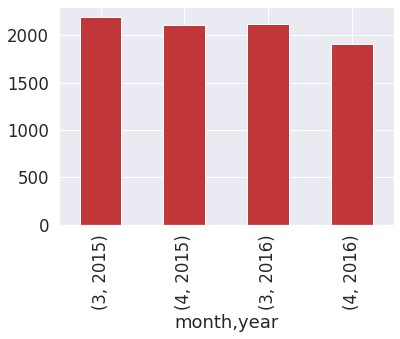

In [ ]:
df[df['month'].isin([3, 4]) & df['year'].isin([2015, 2016])].groupby(['month', 'year'])['title'].count().sort_index(level=1).plot(kind='bar');
plt.grid();

## 2\. Проанализируйте публикации в месяце из предыдущего вопроса

Выберите один или несколько вариантов:

* Один или несколько дней сильно выделяются из общей картины
* На хабре _всегда_ больше статей, чем на гиктаймсе
* По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей

Подсказки: постройте график зависимости числа публикаций от дня; используйте параметр `hue`; не заморачивайтесь сильно с ответами и не ищите скрытого смысла :)

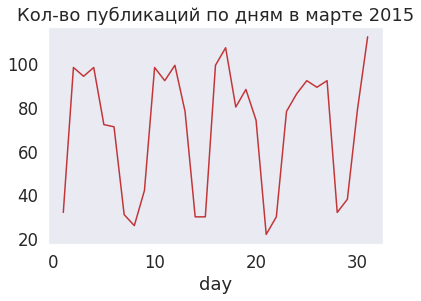

In [ ]:
df[(df['month']==3) & (df['year']==2015)].groupby(df['day']).count()['title'].plot()
plt.title('Кол-во публикаций по дням в марте 2015');

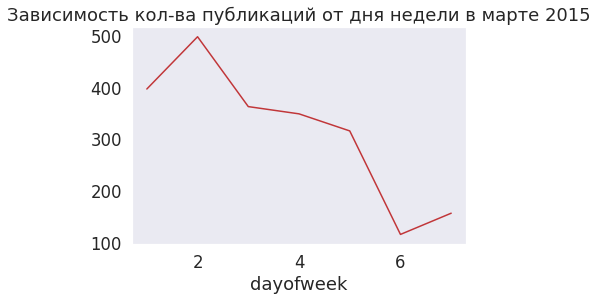

In [ ]:
df[(df['month']==3) & (df['year']==2015)].groupby(df['dayofweek']).count()['title'].plot()
plt.title('Зависимость кол-ва публикаций от дня недели в марте 2015');

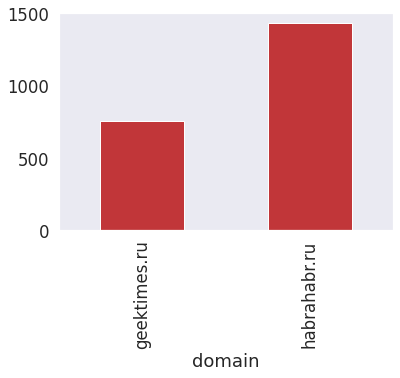

In [ ]:
df['domain'].unique()
df[(df['month']==3) & (df['year']==2015)].groupby(df['domain']).count()['title'].plot(kind='bar');

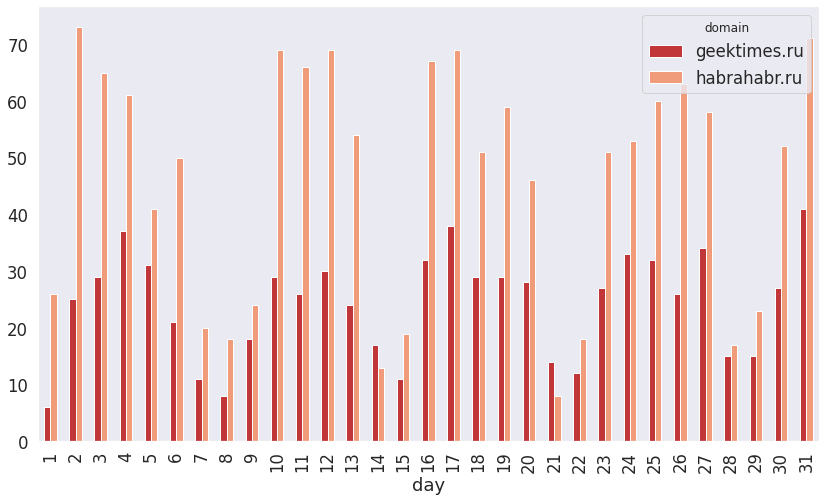

In [ ]:
march15_df = df[(df['month']==3) & (df['year']==2015)]
pd.crosstab(march15_df['day'], march15_df['domain'], values=march15_df['title'], aggfunc='count').plot(kind='bar', figsize=(14,8));

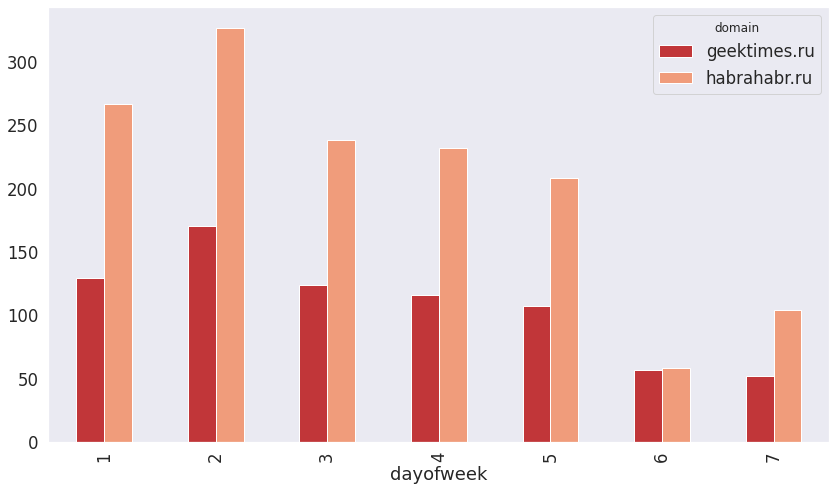

In [ ]:
pd.crosstab(march15_df['dayofweek'], march15_df['domain'], values=march15_df['title'], aggfunc='count').plot(kind='bar', figsize=(14,8));

## 3\. Когда лучше всего публиковать статью?

* Больше всего просмотров набирают статьи, опубликованные в 12 часов дня
* У опубликованных в 10 утра постов больше всего комментариев
* **Больше всего просмотров набирают статьи, опубликованные в 6 часов утра**
* Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера
* На хабре дневные статьи комментируют чаще, чем вечерние

In [ ]:
df_grouped = df.groupby(df['hour'])

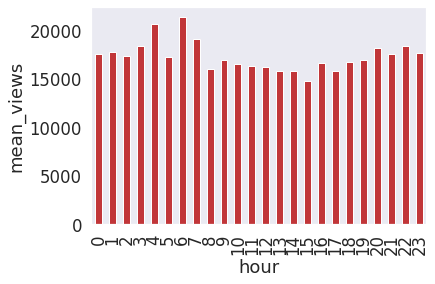

In [ ]:
df_grouped.mean()['views'].plot(kind='bar'); plt.ylabel('mean_views');

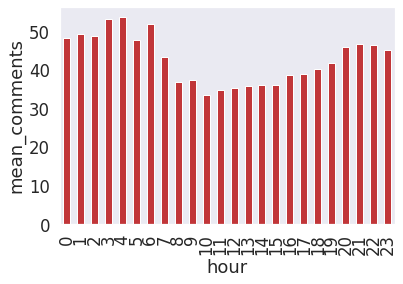

In [ ]:
df_grouped.mean()['comments'].plot(kind='bar'); plt.ylabel('mean_comments');

In [ ]:
geektimes = df['domain'].unique()[1]
habr = df['domain'].unique()[0]
habr, geektimes

('habrahabr.ru', 'geektimes.ru')

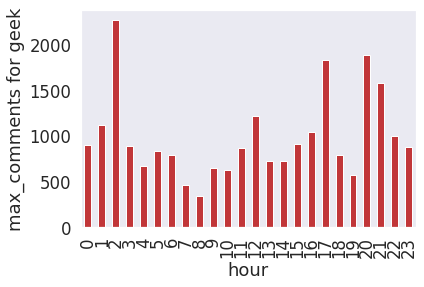

In [ ]:
df[df['domain']==geektimes][['hour', 'comments']].groupby(df['hour']).max()['comments'].plot(kind='bar')
plt.ylabel('max_comments for geek');

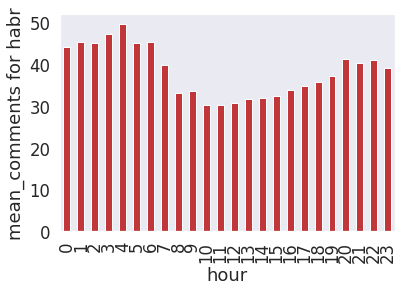

In [ ]:
df[df['domain']==habr][['hour', 'comments']].groupby(df['hour']).mean()['comments'].plot(kind='bar');
plt.ylabel('mean_comments for habr');

## 4\. Кого из топ-20 авторов чаще всего минусуют?

* @Mordatyj
* **@Mithgol**
* @alizar
* @ilya42

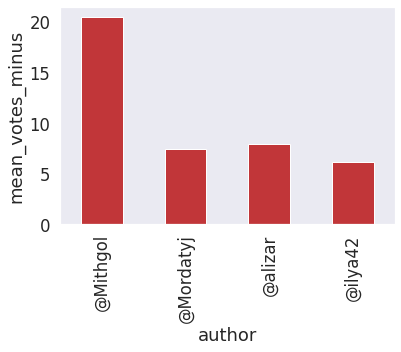

In [ ]:
df[df['author'].isin(['@Mordatyj', '@Mithgol', '@alizar', '@ilya42'])].groupby(df['author']).mean()['votes_minus'].plot(kind='bar')
plt.ylabel('mean_votes_minus');

## 5\. Сравните субботы и понедельники

Правда ли, что по субботам авторы пишут в основном днём, а по понедельникам — в основном вечером?

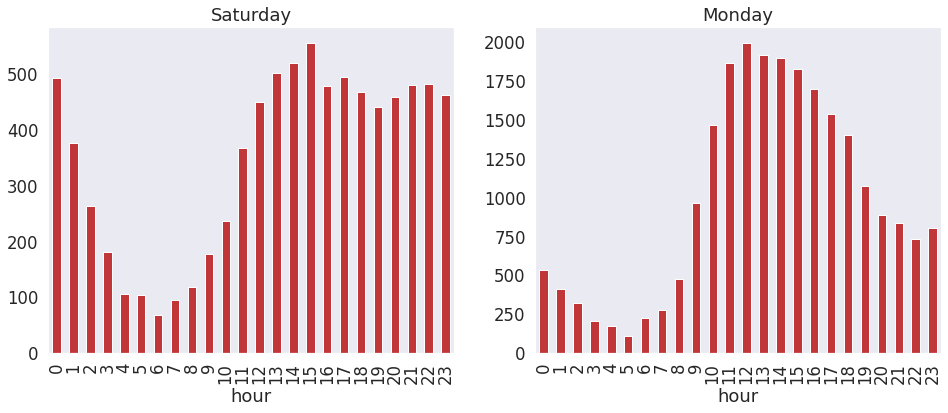

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

df[df['dayofweek']==6].groupby(df['hour']).count()['title'].plot(kind='bar', title='Saturday', ax=axes[0]);
df[df['dayofweek']==1].groupby(df['hour']).count()['title'].plot(kind='bar', title='Monday', ax=axes[1]);